In [1]:
import datetime 
from IPython.display import Markdown

now = datetime.datetime.today().strftime('%d/%m/%Y')

In [2]:
Markdown("""
Nama: Yosafat\n
NIM : 2009992\n
Program Studi: Ilmu Komputer C2 - 2020\n\n
Tanggal: {now}
""".format(now=now))


Nama: Yosafat

NIM : 2009992

Program Studi: Ilmu Komputer C2 - 2020


Tanggal: 14/12/2022


In [3]:
Markdown("""
Sumber data: yfinance\n
- BBCA (01/01/2020 - 13/12/2022)\n
- BBNI (01/01/2020 - 13/12/2022)\n
- ADRO (01/01/2020 - 13/12/2022)\n
- INDY (01/01/2020 - 13/12/2022)\n
""")


Sumber data: yfinance

- BBCA (01/01/2020 - 13/12/2022)

- BBNI (01/01/2020 - 13/12/2022)

- ADRO (01/01/2020 - 13/12/2022)

- INDY (01/01/2020 - 13/12/2022)



In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import datetime
from IPython.display import Markdown
from sklearn.preprocessing import MinMaxScaler

from pandas_datareader.data import DataReader
from datetime import datetime

# standard scaler and isolationforest used for outlier detection
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

# prediction using LSTM
from keras.models import Sequential
from keras.layers import Dense, LSTM

import yfinance as yf

sns.set_theme(style="whitegrid")

In [5]:
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

In [6]:
stock_list = ['bbca', 'bbni', 'adro', 'indy']
stock_code = ['BBCA', 'BBNI', 'ADRO', 'INDY']
stock_ma = ['bbca_ma', 'bbni_ma', 'adro_ma', 'indy_ma']
com_list = []

for x, y, z in zip(stock_list, stock_code, stock_ma):
    globals()[x] = pd.read_csv(f'data\\{y}_13_12_2022.csv', encoding='utf-8')
    globals()[x]['Date'] = pd.to_datetime(globals()[x]['Date'])
    globals()[x]['Volume'] = globals()[x]['Volume'].astype(int)
    globals()[z] = globals()[x]
    globals()[z] =  globals()[z].set_index('Date')
    com_list.append(globals()[z])
     
df = pd.concat(com_list, axis=0)

bbca.head()

,Date,Open,High,Low,Adj Close,Volume
0,2020-01-02,6695.0,6780.0,6680.0,6322.238770,49445000
1,2020-01-03,6750.0,6800.0,6725.0,6426.191406,47755500
2,2020-01-06,6720.0,6750.0,6690.0,6364.764648,27300000
3,2020-01-07,6735.0,6770.0,6730.0,6369.489258,45022500
4,2020-01-08,6670.0,6745.0,6670.0,6312.788574,53692500


In [7]:
bbca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       722 non-null    datetime64[ns]
 1   Open       722 non-null    float64       
 2   High       722 non-null    float64       
 3   Low        722 non-null    float64       
 4   Adj Close  722 non-null    float64       
 5   Volume     722 non-null    int32         
dtypes: datetime64[ns](1), float64(4), int32(1)
memory usage: 31.1 KB


# Exploration Data Analysis

## Price Data

In [8]:
chart = f'Open Price {stock_code[0]}, {stock_code[1]}, {stock_code[2]}, and {stock_code[3]} 2020-2022'

Markdown("""
### {title}
""".format(title=chart))


### Open Price BBCA, BBNI, ADRO, and INDY 2020-2022


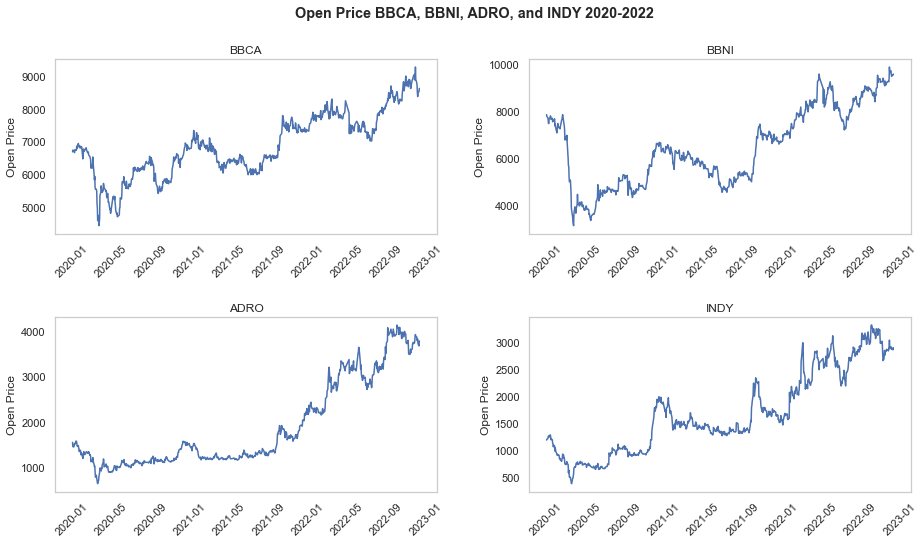

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
fig.tight_layout()
fig.tight_layout(pad=5)

fig.suptitle(f'{chart}', fontweight='bold')

for x, y, ax in zip(stock_list, stock_code, axes.ravel()):
    ax.plot('Date', 'Open',data=globals()[x])
    ax.set_title(y)
    ax.grid(False)
    ax.set_ylabel('Open Price')
    ax.tick_params(axis='x', rotation=45)

plt.show()

In [10]:
chart = f'Adj Close Price {stock_code[0]}, {stock_code[1]}, {stock_code[2]}, and {stock_code[3]} 2020-2022'

Markdown("""
### {title}
""".format(title=chart))


### Adj Close Price BBCA, BBNI, ADRO, and INDY 2020-2022


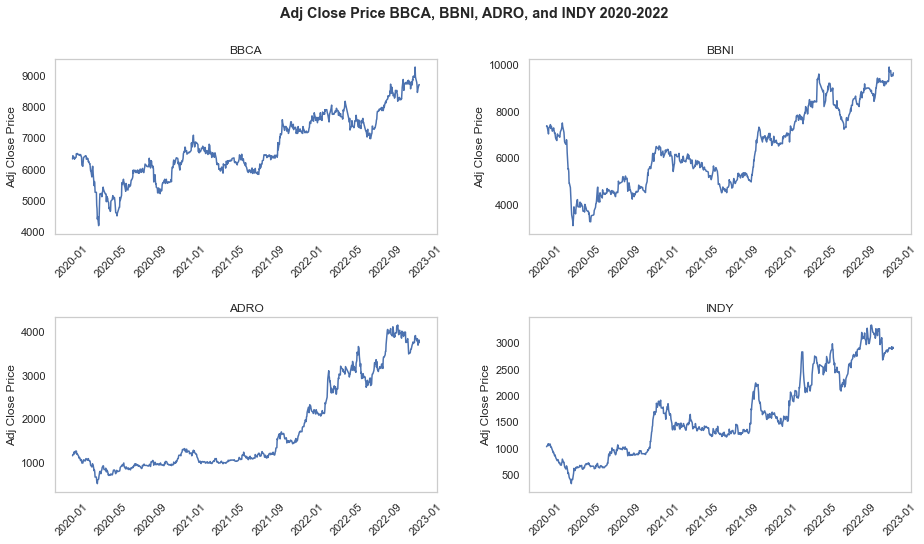

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
fig.tight_layout()
fig.tight_layout(pad=5)

fig.suptitle(f'{chart}', fontweight='bold')

for x, y, ax in zip(stock_list, stock_code, axes.ravel()):
    ax.plot('Date', 'Adj Close',data=globals()[x])
    ax.set_title(y)
    ax.grid(False)
    ax.set_ylabel('Adj Close Price')
    ax.tick_params(axis='x', rotation=45)

plt.show()

In [12]:
chart = f'Open and Adj Close Price {stock_code[0]}, {stock_code[1]}, {stock_code[2]}, and {stock_code[3]} 2020-2022'

Markdown("""
### {title}
""".format(title=chart))


### Open and Adj Close Price BBCA, BBNI, ADRO, and INDY 2020-2022


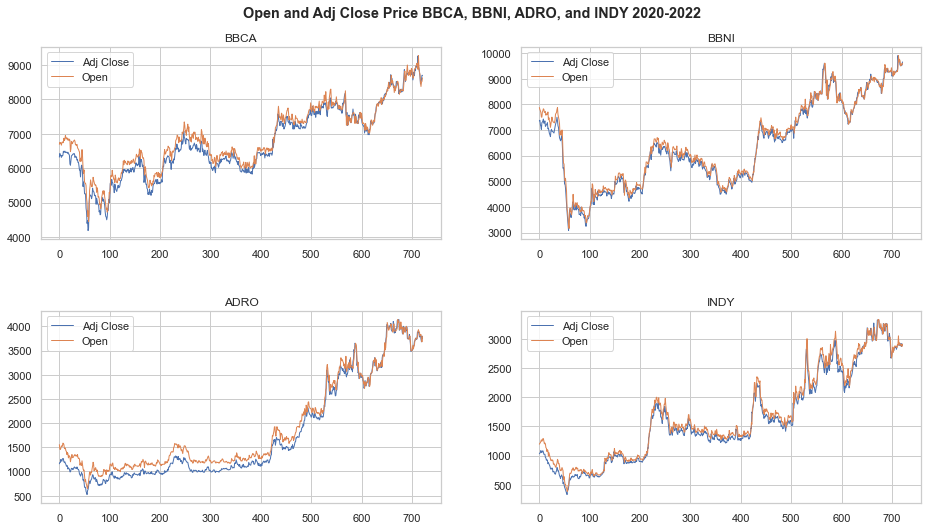

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
fig.tight_layout()
fig.tight_layout(pad=4)

fig.suptitle(f'{chart}', fontweight='bold')

for x, y, ax in zip(stock_list, stock_code, axes.ravel()):
    globals()[x][['Adj Close', 'Open']].plot(ax=ax, linewidth=1)
    ax.set_title(y)
    ax.set_xlabel(None)

plt.show()

In [14]:
chart = f'Volume {stock_code[0]}, {stock_code[1]}, {stock_code[2]}, and {stock_code[3]} 2020-2022'

Markdown("""
### {title}
""".format(title=chart))


### Volume BBCA, BBNI, ADRO, and INDY 2020-2022


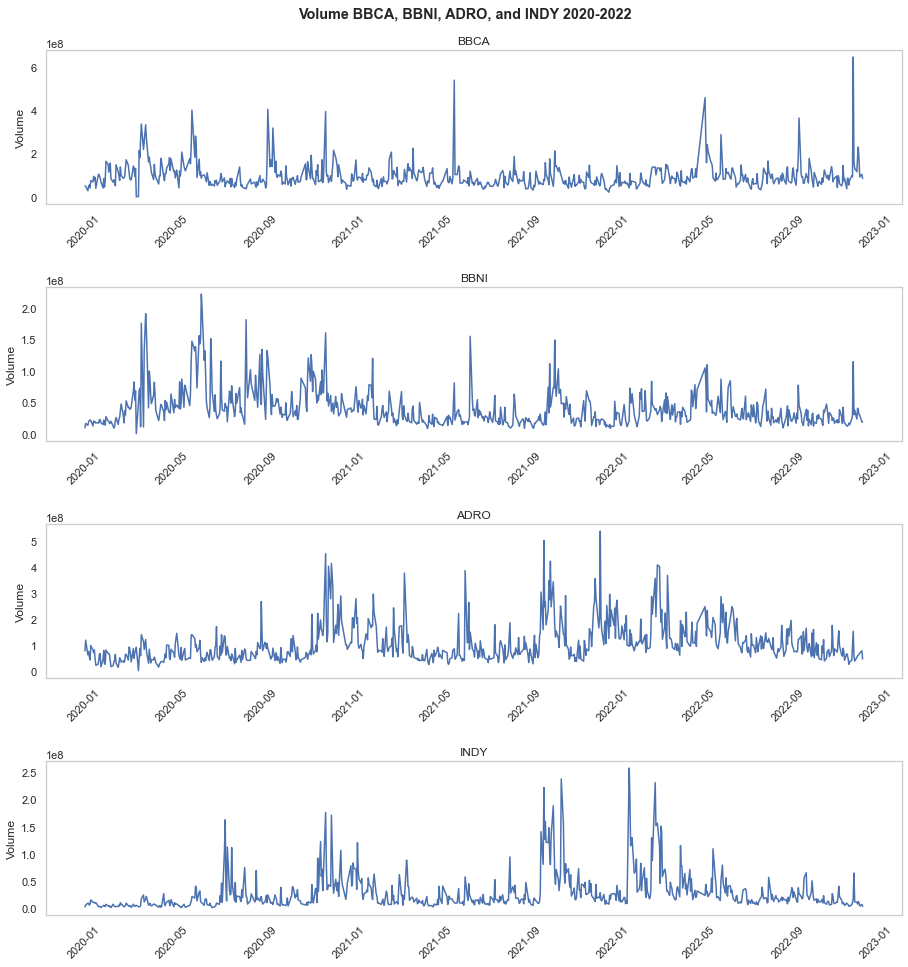

In [15]:
fig, axes = plt.subplots(4, 1, figsize=(14, 14))
fig.tight_layout()
fig.tight_layout(pad=5)

fig.suptitle(f'{chart}', fontweight='bold')

for x, y, ax in zip(stock_list, stock_code, axes.ravel()):
    ax.plot('Date', 'Volume',data=globals()[x])
    ax.set_title(y)
    ax.grid(False)
    ax.set_ylabel('Volume')
    ax.tick_params(axis='x', rotation=45)

plt.show()

In [16]:
chart = 'Distribution of Adj Close Price 2020-2022'

Markdown("""
### {title}
""".format(title=chart))


### Distribution of Adj Close Price 2020-2022


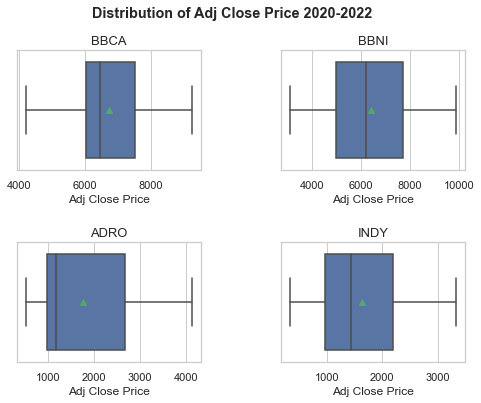

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
fig.tight_layout()
fig.tight_layout(pad=4)

fig.suptitle(f'{chart}', fontweight='bold')

g_stock = ['g_bbca', 'g_bbni', 'g_adro', 'g_indy']

for x, y, z, ax in zip(stock_list, g_stock, stock_code, axes.flatten()):
    y = sns.boxplot(x='Adj Close', data=globals()[x], showmeans=True, ax=ax)
    y.set_title(z ,fontweight="normal", size=13, y=1)
    y.set_xlabel('Adj Close Price', fontsize = 12)

plt.show()

In [18]:
chart = 'Distribution of Volume 2020-2022'

Markdown("""
### {title}
""".format(title=chart))


### Distribution of Volume 2020-2022


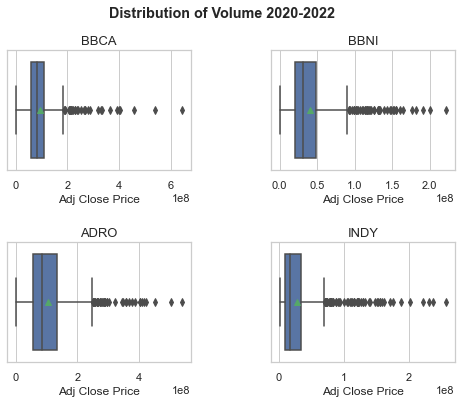

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
fig.tight_layout()
fig.tight_layout(pad=4)

fig.suptitle(f'{chart}', fontweight='bold')

g_stock = ['g_bbca', 'g_bbni', 'g_adro', 'g_indy']

for x, y, z, ax in zip(stock_list, g_stock, stock_code, axes.flatten()):
    y = sns.boxplot(x='Volume', data=globals()[x], showmeans=True, ax=ax)
    y.set_title(z ,fontweight="normal", size=13, y=1)
    y.set_xlabel('Adj Close Price', fontsize = 12)

plt.show()

In [20]:
chart = 'Average Adj Close Price Per Month'

Markdown("""
### {title}
""".format(title=chart))


### Average Adj Close Price Per Month


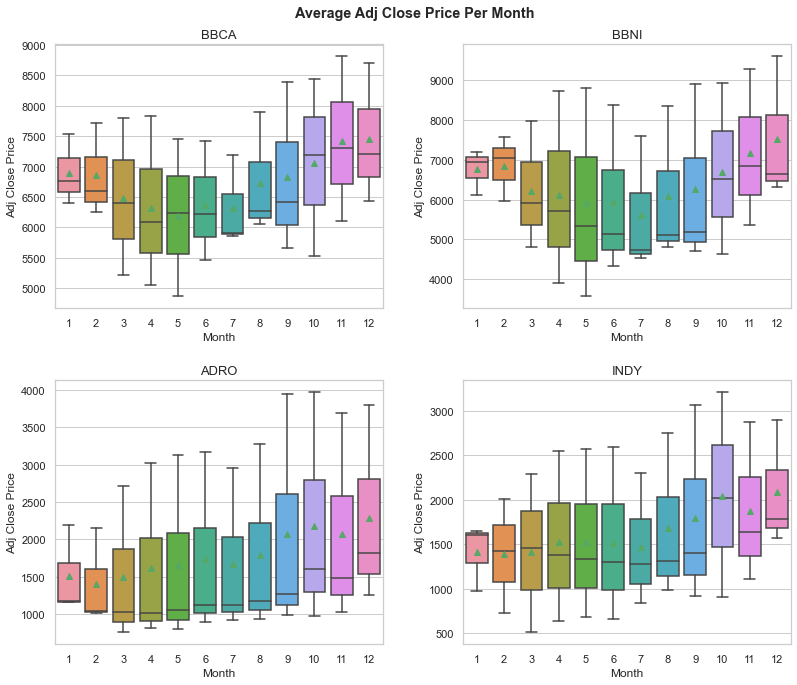

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.tight_layout()
fig.tight_layout(pad=4)

stock_resample = ['bbca_sample', 'bbni_sample', 'adro_sample', 'indy_sample']

for x, y in zip(stock_list, stock_resample):
    globals()[y] = globals()[x].resample('M', on='Date').mean()

fig.suptitle(f'{chart}', fontweight='bold')

for x, y, z, ax in zip(stock_resample, g_stock, stock_code, axes.flatten()):
    y = sns.boxplot(y="Adj Close",x=globals()[x].index.month, data=globals()[x], showmeans=True, ax=ax)
    y.set_title(z, fontweight="normal", size=13, y=1)
    y.set_xlabel('Month', fontsize = 12)
    y.set_ylabel('Adj Close Price')
    
plt.show()

In [22]:
chart = 'Average Volume Per Month'

Markdown("""
### {title}
""".format(title=chart))


### Average Volume Per Month


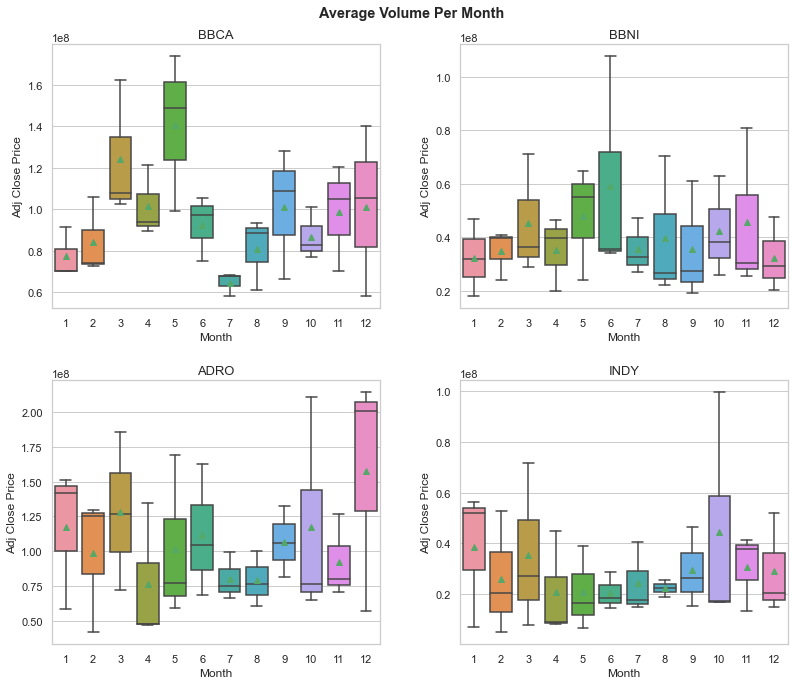

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.tight_layout()
fig.tight_layout(pad=4)

# stock_resample = ['bbca_sample', 'bbni_sample', 'adro_sample', 'indy_sample']

# for x, y in zip(stock_list, stock_resample):
#     globals()[y] = globals()[x].resample('M', on='Date').mean()

fig.suptitle(f'{chart}', fontweight='bold')

for x, y, z, ax in zip(stock_resample, g_stock, stock_code, axes.flatten()):
    y = sns.boxplot(y="Volume",x=globals()[x].index.month, data=globals()[x], showmeans=True, ax=ax)
    y.set_title(z, fontweight="normal", size=13, y=1)
    y.set_xlabel('Month', fontsize = 12)
    y.set_ylabel('Adj Close Price')
    
plt.show()

In [24]:
chart = 'Correlation of Month and Year Based on Average Closing Price'

Markdown("""
### {title}
""".format(title=chart))


### Correlation of Month and Year Based on Average Closing Price


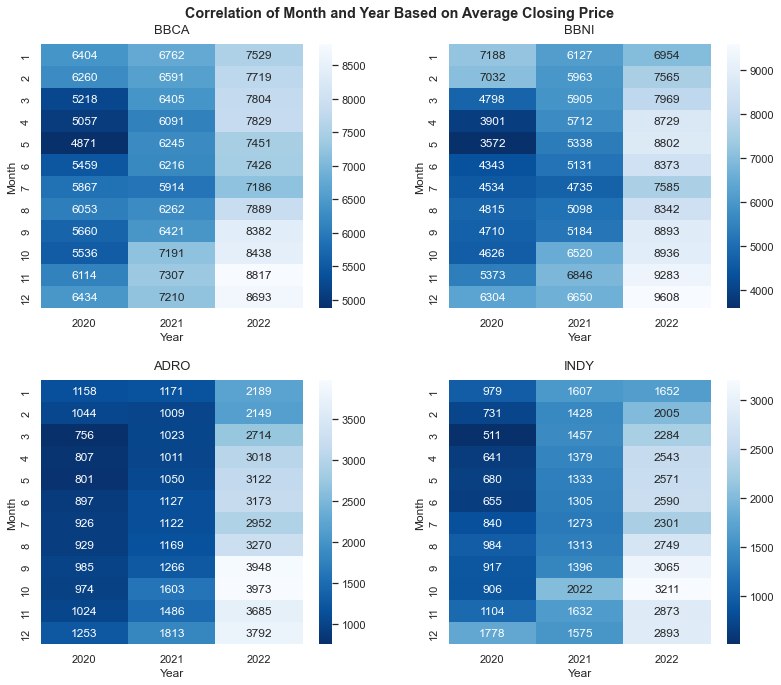

In [25]:
stock_pivot =['bbca_pivot', 'bbni_pivot', 'adro_pivot', 'indy_pivot']

for x, y in zip(stock_pivot, stock_resample):
    globals()[y]["Bulan"] = globals()[y].index.month
    globals()[y]["Tahun"] = globals()[y].index.year
    globals()[x] = globals()[y].pivot("Bulan", "Tahun", "Adj Close")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.tight_layout()
fig.tight_layout(pad=4)

fig.suptitle(f'{chart}', fontweight='bold')

for x, y, z, ax in zip(stock_pivot, g_stock, stock_code, axes.flatten()):
    y = sns.heatmap(data=globals()[x], annot=True, fmt=".0f", cmap = 'Blues_r', ax=ax)
    y.set_title(z, fontweight="normal", size=13, y=1.02)
    y.set_xlabel('Year', fontsize = 12)
    y.set_ylabel('Month')
    
plt.show()

In [26]:
stocks_code = ['BBCA.JK', 'BBNI.JK', 'ADRO.JK', 'INDY.JK']

# now = dt.now().strftime('%Y-%m-%d')

closing_df = DataReader(stocks_code, 'yahoo', '2020-01-01', '2022-11-30')['Adj Close']

closing_df.rename(columns = {'BBCA.JK':'BBCA', 'BBNI.JK':'BBNI', 'ADRO.JK':'ADRO', 'INDY.JK':'INDY'}, inplace = True)
closing_df.head()

stock_rets = closing_df.pct_change()
stock_rets.head()

Symbols,BBCA,BBNI,ADRO,INDY
Date,,,,
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,0.016443,0.003215,0.024819,0.012397
2020-01-06,-0.009559,-0.022436,0.000000,0.008163
2020-01-07,0.000742,-0.009836,0.051195,0.032389
2020-01-08,-0.008902,-0.016556,-0.022727,-0.023529


In [27]:
chart = 'Stocks Correlation Based on Percentage Change of Closing Price'

Markdown("""
### {title}
""".format(title=chart))


### Stocks Correlation Based on Percentage Change of Closing Price


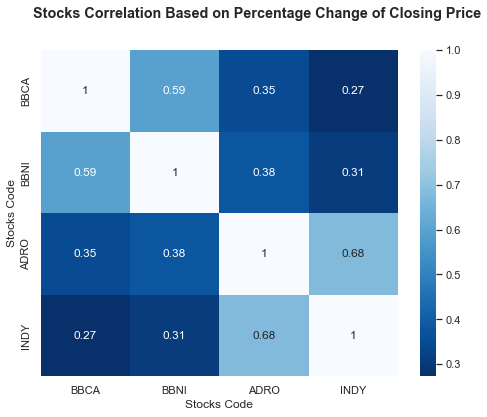

In [28]:
plt.figure(figsize=(8, 6))

plt.suptitle(f'{chart}', fontweight='bold')

g = sns.heatmap(stock_rets.corr(), annot=True, cmap = 'Blues_r')
g.set(ylabel='Stocks Code', xlabel='Stocks Code')

plt.show()

In [29]:
chart = f'Moving Averages of {stock_code[0]}, {stock_code[1]}, {stock_code[2]}, and {stock_code[3]} 2020-2022'

Markdown("""
### {title}
""".format(title=chart))


### Moving Averages of BBCA, BBNI, ADRO, and INDY 2020-2022


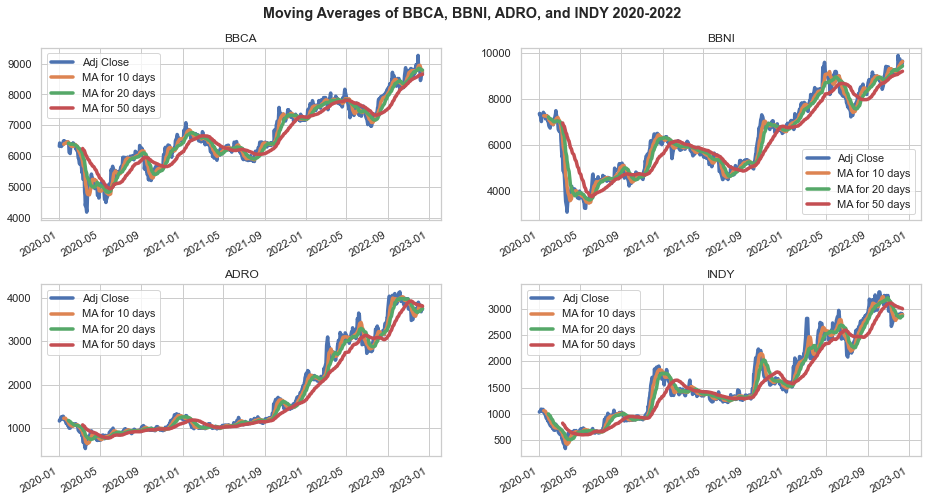

In [30]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
fig.tight_layout()
fig.tight_layout(pad=4)

fig.suptitle(f'{chart}', fontweight='bold')

ma_day = [10, 20, 50]

for ma in ma_day:
    for company in com_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

for x, y, ax in zip(stock_ma, stock_code, axes.ravel()):
    globals()[x][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=ax, linewidth=3.5)
    ax.set_title(y)
    ax.set_xlabel(None)

plt.show()

In [31]:
chart = f'Outlier Detection {stock_code[0]}, {stock_code[1]}, {stock_code[2]}, and {stock_code[3]} 2020-2022'

Markdown("""
### {title}
""".format(title=chart))


### Outlier Detection BBCA, BBNI, ADRO, and INDY 2020-2022


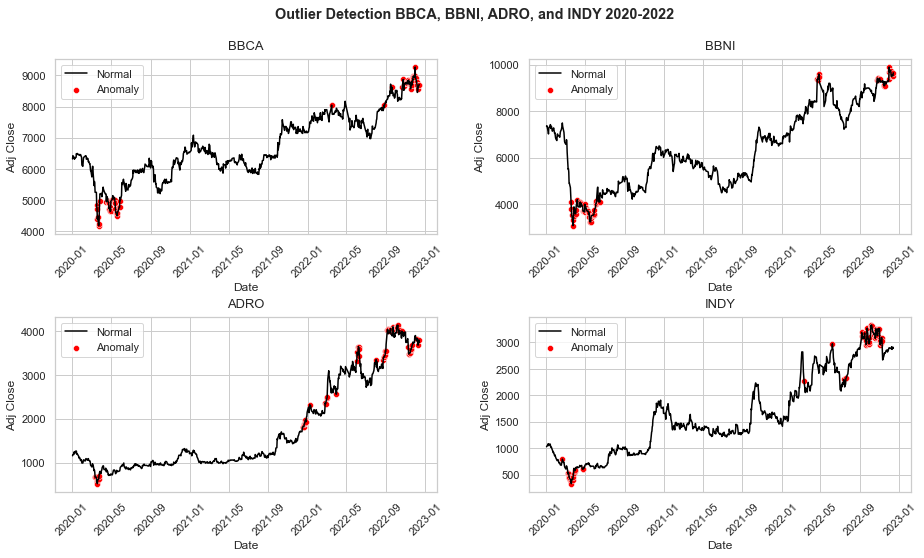

In [32]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
fig.tight_layout()
fig.tight_layout(pad=5)

fig.suptitle(f'{chart}', fontweight='bold')

for x in stock_ma:
    outliers_fraction = float(.09)
    scaler = StandardScaler()
    globals()[x]['Adj_Close'] = globals()[x]['Adj Close']
    np_scaled = scaler.fit_transform(globals()[x].Adj_Close.values.reshape(-1, 1))
    data = pd.DataFrame(np_scaled)
    model =  IsolationForest(contamination=outliers_fraction)
    model.fit(data)
    globals()[x]['anomaly'] = model.predict(data) 

for x, y, ax in zip(stock_ma, stock_code, axes.flatten()):
    a = globals()[x].loc[globals()[x]['anomaly'] == -1, ['Adj Close']]
    g = sns.lineplot(data=globals()[x], x="Date", y='Adj Close', color='black', label = 'Normal', ax=ax)
    g.tick_params(axis='x', rotation=45)
    g.set_title(y, fontweight="normal", size=13, y=1.02)
    g2= sns.scatterplot(data=a,x=a.index,y=a['Adj Close'], color='red', label = 'Anomaly', ax=ax)

plt.show()

## Fundamental Data

### Preprocessing

In [33]:
chart = f'Preprocessing Fundamental Data'

Markdown("""
### {title}
""".format(title=chart))


### Preprocessing Fundamental Data


In [34]:
stock_fund = ['bbca_fund', 'bbni_fund', 'adro_fund', 'indy_fund']

for x, y, z in zip(stock_list, stocks_code, stock_fund):
    data_fund = yf.Ticker(f'{y}')
    df_cf = data_fund.cashflow
    df_cf = df_cf.T
    df_cf = df_cf[['Net Income', 'Investments']]
    date = ['2021', '2020', '2019', '2018']
    df_cf['Date'] = date
    df_cf = df_cf.set_index("Date")

    df_bs = data_fund.balance_sheet
    df_bs = df_bs.T
    df_bs = df_bs[['Total Liab', 'Total Assets', 'Cash']]
    date = ['2021', '2020', '2019', '2018']
    df_bs['Date'] = date
    df_bs = df_bs.set_index("Date")

    df_inc = data_fund.earnings
    date = ['2018', '2019', '2020', '2021']
    df_inc = df_inc[['Revenue']]
    df_inc['Date'] = date
    df_inc = df_inc.set_index("Date")
    df_inc = df_inc.sort_values(by=['Date'], ascending=False)

    data_final = (pd.merge(df_cf, df_bs, left_index=True, right_index=True))
    data_final = (pd.merge(data_final, df_inc, left_index=True, right_index=True))
    data_final = data_final.sort_values(by=['Date'], ascending=True)
    globals()[z] = data_final

In [35]:
adro_fund

,Net Income,Investments,Total Liab,Total Assets,Cash,Revenue
Date,,,,,,
2018,417720000.0,-414036000.0,2.758063e+09,7.060755e+09,9.278960e+08,3619751000
2019,404190000.0,24094000.0,3.233710e+09,7.217105e+09,1.576191e+09,3457154000
2020,146927000.0,-182379000.0,2.429852e+09,6.381566e+09,1.173703e+09,2534842000
2021,933492000.0,-296901000.0,3.128621e+09,7.586936e+09,1.811141e+09,3992718000


In [36]:
chart = f'Cash vs Investments {stock_code[0]}, {stock_code[1]}, {stock_code[2]}, and {stock_code[3]} 2018-2021'

Markdown("""
### {title}
""".format(title=chart))


### Cash vs Investments BBCA, BBNI, ADRO, and INDY 2018-2021


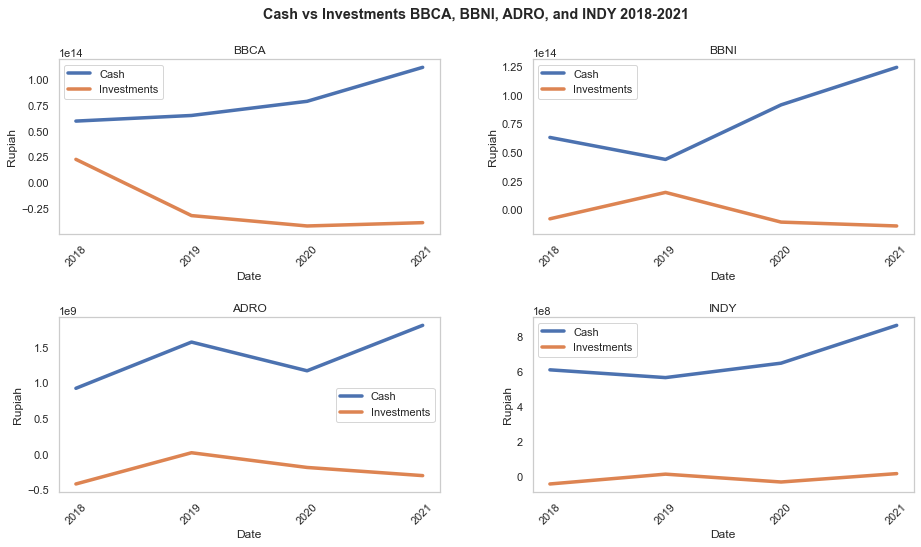

In [37]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
fig.tight_layout()
fig.tight_layout(pad=5)

fig.suptitle(f'{chart} ', fontweight='bold')

for x, y, ax in zip(stock_fund, stock_code, axes.ravel()):
#     ax.plot('Cash',data=globals()[x])
    globals()[x][['Cash', 'Investments']].plot(ax=ax, linewidth=3.5)
    ax.set_title(y)
    ax.grid(False)
    ax.set_ylabel('Rupiah')
    ax.tick_params(axis='x', rotation=45)

plt.show()

In [38]:
chart = f'Assets vs Liabilities {stock_code[0]}, {stock_code[1]}, {stock_code[2]}, and {stock_code[3]} 2018-2021'

Markdown("""
### {title}
""".format(title=chart))


### Assets vs Liabilities BBCA, BBNI, ADRO, and INDY 2018-2021


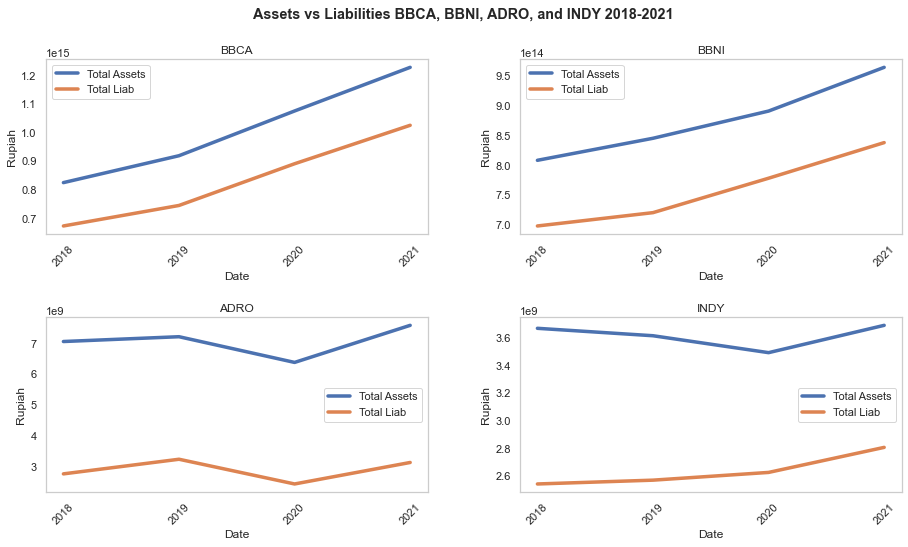

In [39]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
fig.tight_layout()
fig.tight_layout(pad=5)

fig.suptitle(f'{chart} ', fontweight='bold')

for x, y, ax in zip(stock_fund, stock_code, axes.ravel()):
#     ax.plot('Cash',data=globals()[x])
    globals()[x][['Total Assets', 'Total Liab']].plot(ax=ax, linewidth=3.5)
    ax.set_title(y)
    ax.grid(False)
    ax.set_ylabel('Rupiah')
    ax.tick_params(axis='x', rotation=45)

plt.show()

In [40]:
chart = f'Net Income vs Revenue {stock_code[0]}, {stock_code[1]}, {stock_code[2]}, and {stock_code[3]} 2018-2021'

Markdown("""
### {title}
""".format(title=chart))


### Net Income vs Revenue BBCA, BBNI, ADRO, and INDY 2018-2021


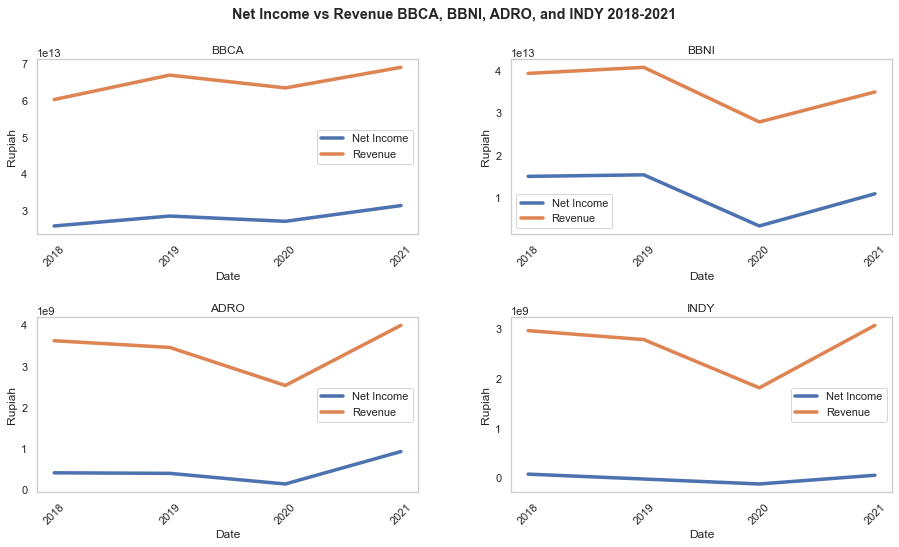

In [41]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
fig.tight_layout()
fig.tight_layout(pad=5)

fig.suptitle(f'{chart} ', fontweight='bold')

for x, y, ax in zip(stock_fund, stock_code, axes.ravel()):
#     ax.plot('Cash',data=globals()[x])
    globals()[x][['Net Income', 'Revenue']].plot(ax=ax, linewidth=3.5)
    ax.set_title(y)
    ax.grid(False)
    ax.set_ylabel('Rupiah')
    ax.tick_params(axis='x', rotation=45)

plt.show()

In [42]:
chart = f'Fundamental Data Correlation {stock_code[0]}, {stock_code[1]}, {stock_code[2]}, and {stock_code[3]}'

Markdown("""
### {title}
""".format(title=chart))


### Fundamental Data Correlation BBCA, BBNI, ADRO, and INDY


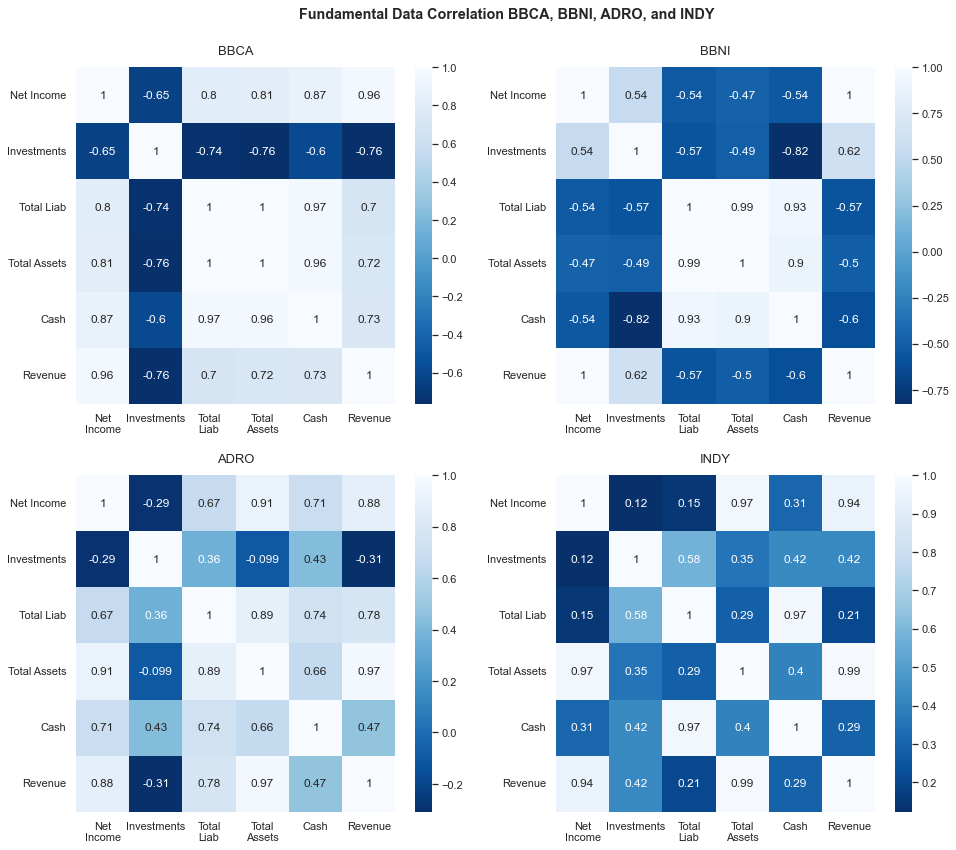

In [43]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.tight_layout()
fig.tight_layout(pad=4)

fig.suptitle(f'{chart}', fontweight='bold', y=1.01)

for x, y, z, ax in zip(stock_fund, g_stock, stock_code, axes.flatten()):
    y = sns.heatmap(globals()[x].corr(), annot=True, cmap = 'Blues_r', ax=ax)
    wrap_labels(ax, 8)
    y.set_title(z, fontweight="normal", size=13, y=1.02)
    
plt.show()

# Forecasting

In [44]:
chart = f'{stock_code[0]} Forecasting'

Markdown("""
### {title}
""".format(title=chart))


### BBCA Forecasting


In [45]:
data = bbca_ma.filter(['Adj Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=1, epochs=1)

[array([0.42064475, 0.44111852, 0.42902034, 0.42995087, 0.41878351,
       0.42995087, 0.427159  , 0.43088168, 0.45414731, 0.44763296,
       0.45042482, 0.45507803, 0.44763296, 0.44670234, 0.44856358,
       0.44856358, 0.44297976, 0.44856358, 0.43925727, 0.43832665,
       0.42995087, 0.38155827, 0.37411321, 0.40389328, 0.42808972,
       0.42995087, 0.43367345, 0.43832665, 0.43739603, 0.44111852,
       0.43925727, 0.41878351, 0.42622838, 0.42157528, 0.42157528,
       0.40296266, 0.40668534, 0.38993406, 0.39086458, 0.37039063,
       0.34619438, 0.34619438, 0.3071079 , 0.3517781 , 0.37411321,
       0.37318259, 0.329443  , 0.25220076, 0.27825835, 0.26429884,
       0.21032233, 0.21032233, 0.21032233, 0.12842698, 0.10609188,
       0.04094772, 0.05676847, 0.        , 0.01302889, 0.15820706])]
[0.20101611493273508]

[array([0.42064475, 0.44111852, 0.42902034, 0.42995087, 0.41878351,
       0.42995087, 0.427159  , 0.43088168, 0.45414731, 0.44763296,
       0.45042482, 0.45507803, 0.44

In [46]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 2s 17ms/step


163.25801491725704

In [47]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10604\2657761684.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


In [48]:
chart = f'{stock_code[0]} Forecasting Result'

Markdown("""
### {title}
""".format(title=chart))


### BBCA Forecasting Result


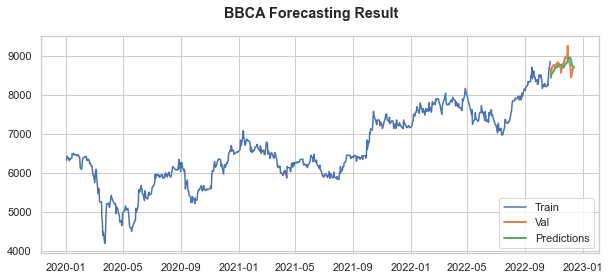

In [49]:
plt.figure(figsize=(10, 4))

plt.suptitle(f'{chart}', fontweight='bold')

plt.plot(train[['Adj Close']])
plt.plot(valid[['Adj Close', 'Predictions']], linewidth=2)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

plt.show()

In [50]:
chart = f'{stock_code[1]} Forecasting'

Markdown("""
### {title}
""".format(title=chart))


### BBNI Forecasting


In [51]:
data = bbni_ma.filter(['Adj Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=1, epochs=1)

[array([0.62666641, 0.63013296, 0.6058673 , 0.59546779, 0.5781351 ,
       0.61626689, 0.61973337, 0.62666641, 0.63706599, 0.61280034,
       0.61626689, 0.62666641, 0.59546779, 0.5989342 , 0.6058673 ,
       0.60933386, 0.61626689, 0.58160172, 0.5850682 , 0.56773558,
       0.55386951, 0.54693648, 0.53653704, 0.56773558, 0.5781351 ,
       0.56773558, 0.56773558, 0.56426903, 0.56080262, 0.557336  ,
       0.57466869, 0.59200124, 0.6058673 , 0.61626689, 0.62666641,
       0.64746551, 0.62666641, 0.5989342 , 0.58853468, 0.56080262,
       0.52960393, 0.5226709 , 0.51284829, 0.51999107, 0.54141927,
       0.52356243, 0.46284918, 0.35570819, 0.35927954, 0.33785134,
       0.26642403, 0.26642403, 0.23999591, 0.19285387, 0.14856886,
       0.10714107, 0.06857027, 0.03285662, 0.        , 0.06142753])]
[0.11856941935652904]

[array([0.62666641, 0.63013296, 0.6058673 , 0.59546779, 0.5781351 ,
       0.61626689, 0.61973337, 0.62666641, 0.63706599, 0.61280034,
       0.61626689, 0.62666641, 0.59

In [52]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 3s 17ms/step


970.9301820834809

In [53]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10604\2657761684.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


In [54]:
chart = f'{stock_code[1]} Forecasting Result'

Markdown("""
### {title}
""".format(title=chart))


### BBNI Forecasting Result


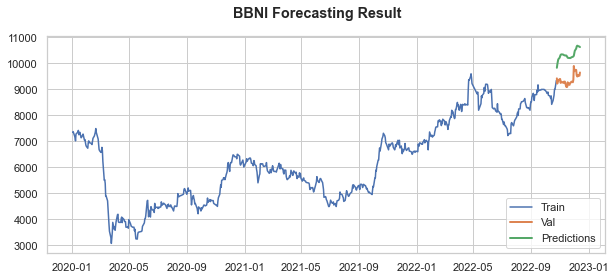

In [55]:
plt.figure(figsize=(10, 4))

plt.suptitle(f'{chart}', fontweight='bold')

plt.plot(train[['Adj Close']])
plt.plot(valid[['Adj Close', 'Predictions']], linewidth=2)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

plt.show()

In [56]:
chart = f'{stock_code[2]} Forecasting'

Markdown("""
### {title}
""".format(title=chart))


### ADRO Forecasting


In [57]:
data = adro_ma.filter(['Adj Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=1, epochs=1)

[array([0.1758061 , 0.18375693, 0.18375693, 0.20056397, 0.19272072,
       0.19047976, 0.20280497, 0.20616635, 0.2050459 , 0.18599789,
       0.18487741, 0.18711838, 0.17703413, 0.17255227, 0.16134755,
       0.16470896, 0.16470896, 0.14566106, 0.15238379, 0.14790196,
       0.14566106, 0.12997444, 0.12997444, 0.14005868, 0.15014285,
       0.14790196, 0.14790196, 0.14229961, 0.15014285, 0.15350427,
       0.15798617, 0.15126334, 0.15126334, 0.15350427, 0.14790196,
       0.15798617, 0.14902241, 0.14342006, 0.14342006, 0.13557677,
       0.11652881, 0.11428788, 0.10532414, 0.11092645, 0.12549256,
       0.11876973, 0.11540833, 0.08179424, 0.08627614, 0.07171003,
       0.04145737, 0.04145737, 0.04145737, 0.0179275 , 0.01008421,
       0.        , 0.02240938, 0.02913221, 0.04593925, 0.07171003])]
[0.07731237576510941]

[array([0.1758061 , 0.18375693, 0.18375693, 0.20056397, 0.19272072,
       0.19047976, 0.20280497, 0.20616635, 0.2050459 , 0.18599789,
       0.18487741, 0.18711838, 0.17

In [58]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 3s 16ms/step


144.25004487899065

In [59]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10604\2657761684.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


In [60]:
chart = f'{stock_code[2]} Forecasting Result'

Markdown("""
### {title}
""".format(title=chart))


### ADRO Forecasting Result


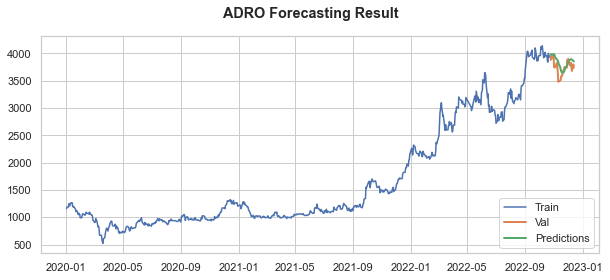

In [61]:
plt.figure(figsize=(10, 4))

plt.suptitle(f'{chart}', fontweight='bold')

plt.plot(train[['Adj Close']])
plt.plot(valid[['Adj Close', 'Predictions']], linewidth=2)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

plt.show()

In [62]:
chart = f'{stock_code[3]} Forecasting'

Markdown("""
### {title}
""".format(title=chart))


### INDY Forecasting


In [63]:
data = indy_ma.filter(['Adj Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=1, epochs=1)

[array([0.23290304, 0.23716344, 0.24000375, 0.25136487, 0.24284402,
       0.24000375, 0.2485246 , 0.24994473, 0.24284402, 0.23006277,
       0.23006277, 0.23006277, 0.21160094, 0.20876067, 0.19597938,
       0.19739955, 0.19739955, 0.17609744, 0.18177799, 0.1746773 ,
       0.16757659, 0.16189603, 0.14911476, 0.14485434, 0.14627447,
       0.15195503, 0.14911476, 0.1292328 , 0.13207306, 0.13207306,
       0.12213208, 0.11787166, 0.11645152, 0.13065293, 0.1334932 ,
       0.15479532, 0.14911476, 0.1334932 , 0.13491335, 0.12213208,
       0.10793068, 0.10225012, 0.09230914, 0.10367025, 0.1121911 ,
       0.10509041, 0.09940985, 0.06248617, 0.06816673, 0.05822576,
       0.04260421, 0.03550351, 0.02556253, 0.01647363, 0.00795279,
       0.        , 0.0272667 , 0.02556253, 0.03976394, 0.06674659])]
[0.09656956011613244]

[array([0.23290304, 0.23716344, 0.24000375, 0.25136487, 0.24284402,
       0.24000375, 0.2485246 , 0.24994473, 0.24284402, 0.23006277,
       0.23006277, 0.23006277, 0.21

In [64]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 3s 26ms/step


136.213367354134

In [65]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10604\2657761684.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


In [66]:
chart = f'{stock_code[3]} Forecasting Result'

Markdown("""
### {title}
""".format(title=chart))


### INDY Forecasting Result


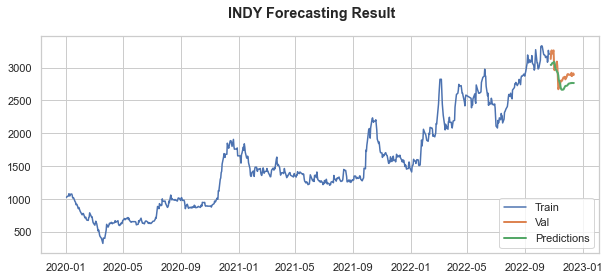

In [67]:
plt.figure(figsize=(10, 4))

plt.suptitle(f'{chart}', fontweight='bold')

plt.plot(train[['Adj Close']])
plt.plot(valid[['Adj Close', 'Predictions']], linewidth=2)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

plt.show()